In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [30]:
# 한글 폰트 깨지지 않게 하기
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [31]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv("../01.files/02.Bigsata_analysis/체질검사.csv", encoding = 'euc-kr')
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [33]:
df[['WEIGHT', 'WEIGHT_UNIT']] = df['WEIGHT'].str.split(expand = True)
df[['HEIGHT', 'HEIGHT_UNIT']] = df['HEIGHT'].str.split(expand = True)
df['WEIGHT'] = df['WEIGHT'].astype('float64')
df['HEIGHT'] = df['HEIGHT'].astype('float64')
df.info()
df = df.drop(['WEIGHT_UNIT', 'HEIGHT_UNIT'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [34]:
df = pd.get_dummies(df, drop_first=False)
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_남성,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,1,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,1,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,1,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,0,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,0,1


In [35]:
df_y = df['FAT']
df_x = df.drop(['FAT'], axis = 1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=777)

print("df_train_x:",df_train_x.shape)
print("df_test_x:",df_test_x.shape)
print("df_train_y:",df_train_y.shape)
print("df_test_y:",df_test_y.shape)

df_train_x: (176, 15)
df_test_x: (76, 15)
df_train_y: (176,)
df_test_y: (76,)


In [36]:
tree_uncustomized = DecisionTreeRegressor(random_state = 777)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.224


In [37]:
tree_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 777,
 'splitter': 'best'}

In [38]:
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=777, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score    

In [39]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.224
1,2,0.976,0.259
2,3,0.953,0.333
3,4,0.921,0.343
4,5,0.887,0.454
5,6,0.851,0.546
6,7,0.838,0.526
7,8,0.830,0.574
8,9,0.827,0.555
9,10,0.825,0.536


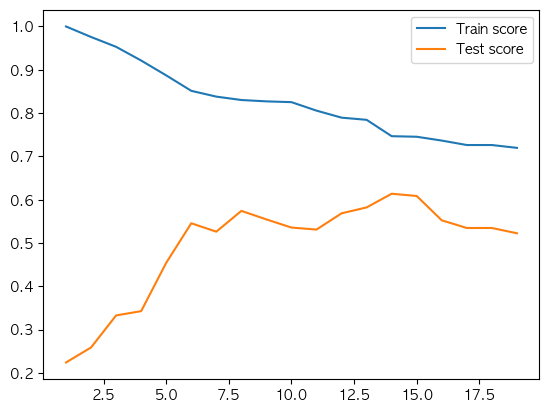

In [40]:
plt.plot(para_leaf, train_score, label = "Train score")
plt.plot(para_leaf, test_score, label = "Test score")
plt.legend()
plt.show()

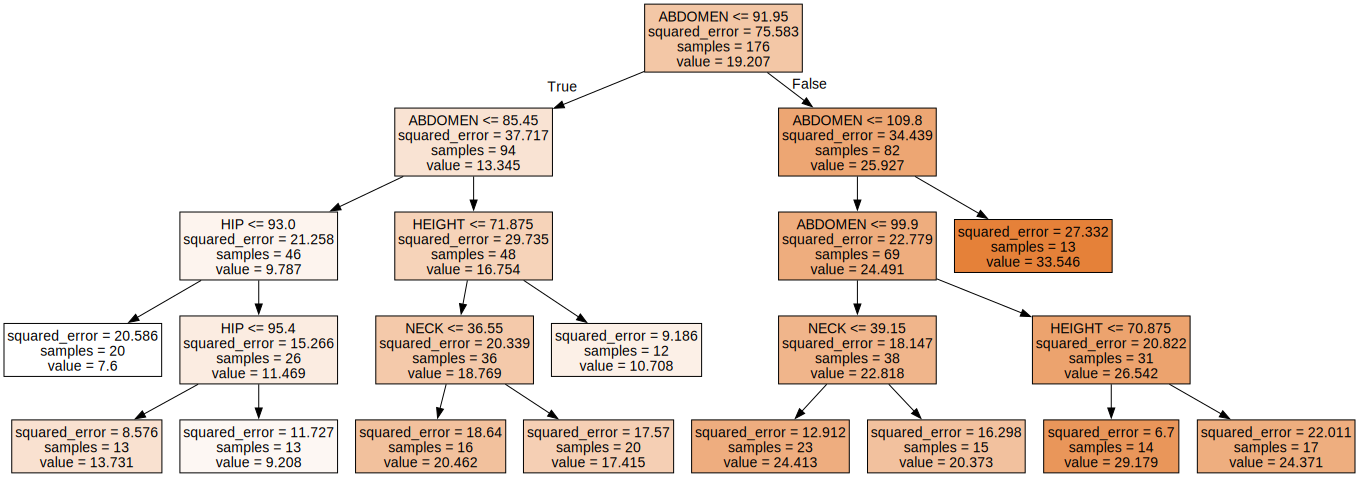

In [41]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=777, min_samples_leaf = 12)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
                feature_names=v_feature_name,
                impurity=True,
                filled=True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

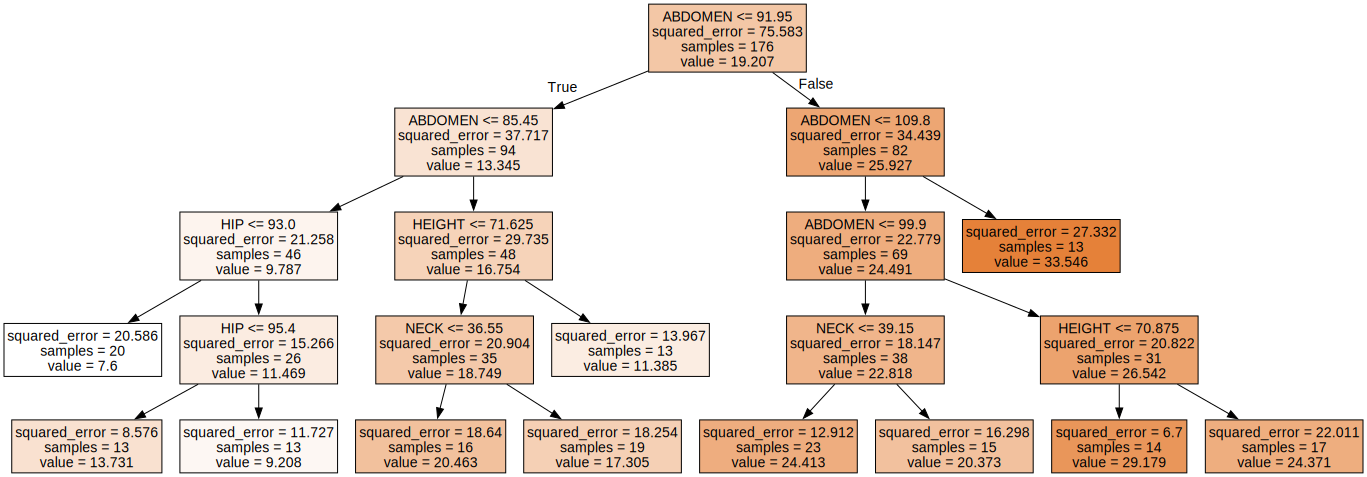

In [42]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=777, min_samples_leaf = 13)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
                feature_names=v_feature_name,
                impurity=True,
                filled=True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [43]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=777, min_samples_leaf=8,
                                 min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplessplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score   
df_score_split.round(3)

,MinSamplessplit,TrainScore,TestScore
0,4,0.830,0.574
1,6,0.830,0.574
2,8,0.830,0.574
3,10,0.830,0.574
4,12,0.830,0.574
5,14,0.830,0.574
6,16,0.830,0.574
7,18,0.825,0.568
8,20,0.825,0.568
9,22,0.825,0.568


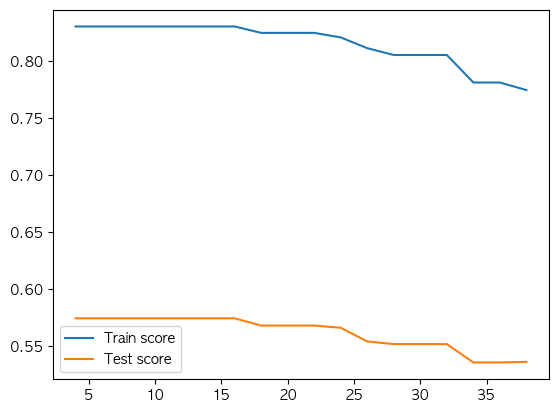

In [44]:
plt.plot(para_split, train_score, label = "Train score")
plt.plot(para_split, test_score, label = "Test score")
plt.legend()
plt.show()

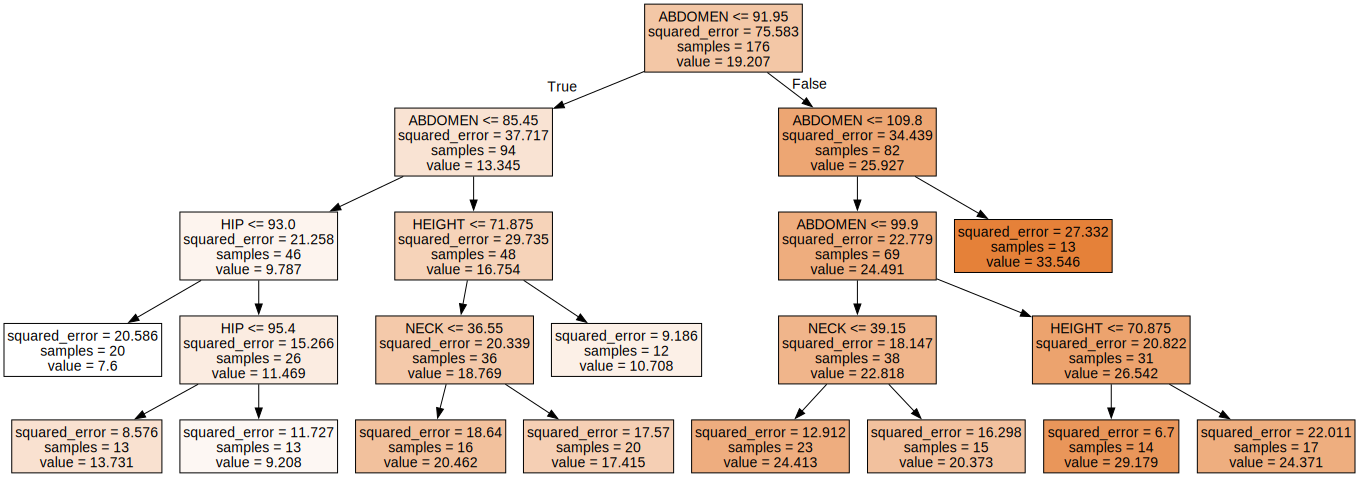

In [45]:
tree_graph = DecisionTreeRegressor(random_state=777, min_samples_leaf = 12, min_samples_split=10)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot",
                feature_names=v_feature_name,
                impurity=True,
                filled=True)

with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [46]:
train_score = []
test_score = []

para_depth = [depth * 2 for depth in range(1,12)]

for v_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=777, min_samples_leaf=8,
                                 min_samples_split=10, max_depth=v_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["Maxdepth"] = para_depth
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score   
df_score_split.round(3)

,Maxdepth,TrainScore,TestScore
0,2,0.678,0.574
1,4,0.805,0.552
2,6,0.830,0.574
3,8,0.830,0.574
4,10,0.830,0.574
5,12,0.830,0.574
6,14,0.830,0.574
7,16,0.830,0.574
8,18,0.830,0.574
9,20,0.830,0.574


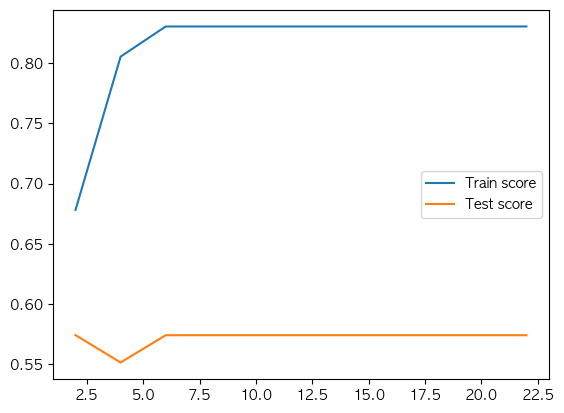

In [47]:
plt.plot(para_depth, train_score, label = "Train score")
plt.plot(para_depth, test_score, label = "Test score")
plt.legend()
plt.show()

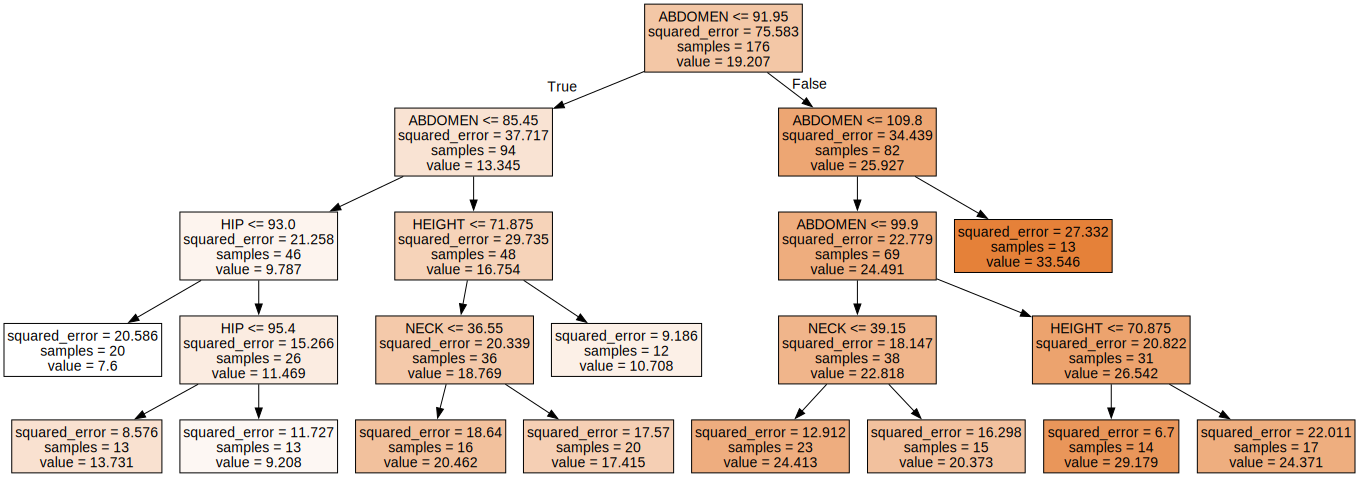

In [48]:
tree_graph = DecisionTreeRegressor(random_state=777, min_samples_leaf = 12, min_samples_split=10, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_depth.dot",
                feature_names=v_feature_name,
                impurity=True,
                filled=True)

with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

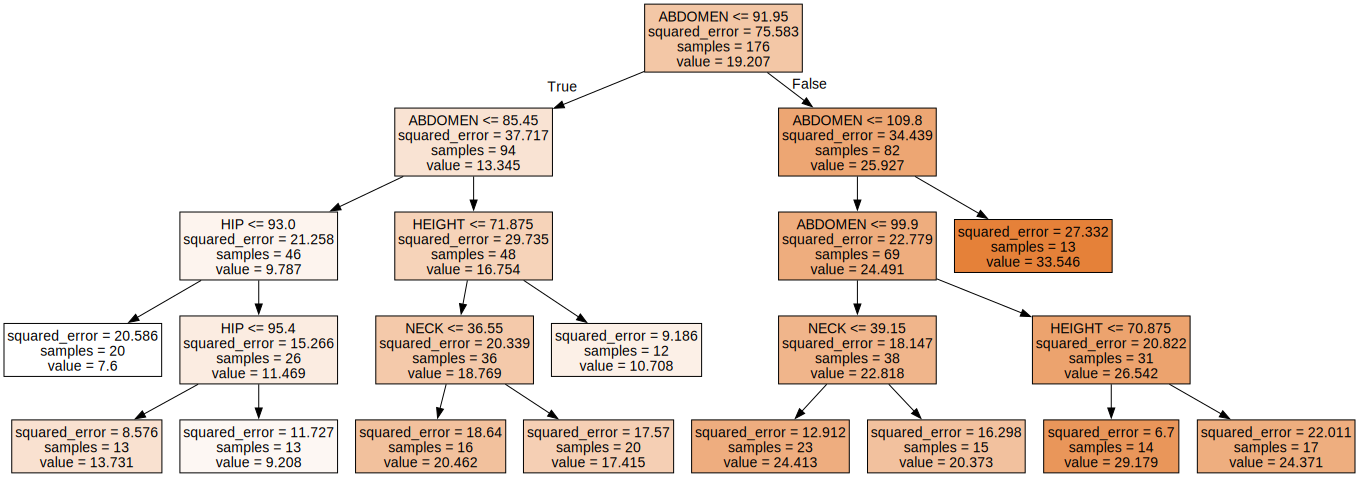

In [49]:
tree_graph = DecisionTreeRegressor(random_state=777, min_samples_leaf = 12, min_samples_split=10, max_depth=6)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_depth.dot",
                feature_names=v_feature_name,
                impurity=True,
                filled=True)

with open("tree_depth.dot", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [50]:
import numpy as np

v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(random_state=777, min_samples_leaf = 12, min_samples_split=10, max_depth=4)
tree_final.fit(df_train_x, df_train_y)
tree_final.get_params()

test_pred = tree_final.predict(df_test_x)
df_pred = pd.DataFrame()
df_pred['실제값'] = df_test_y
df_pred['예측값'] = np.round(test_pred, 0)
print(df_pred.head(10))

      실제값   예측값
25   21.0  24.0
137  21.3  24.0
57   24.9  24.0
12   16.7  20.0
159  19.5  11.0
135  22.4  20.0
189  12.9  14.0
236  25.8  20.0
211  20.4  24.0
6    23.3  17.0


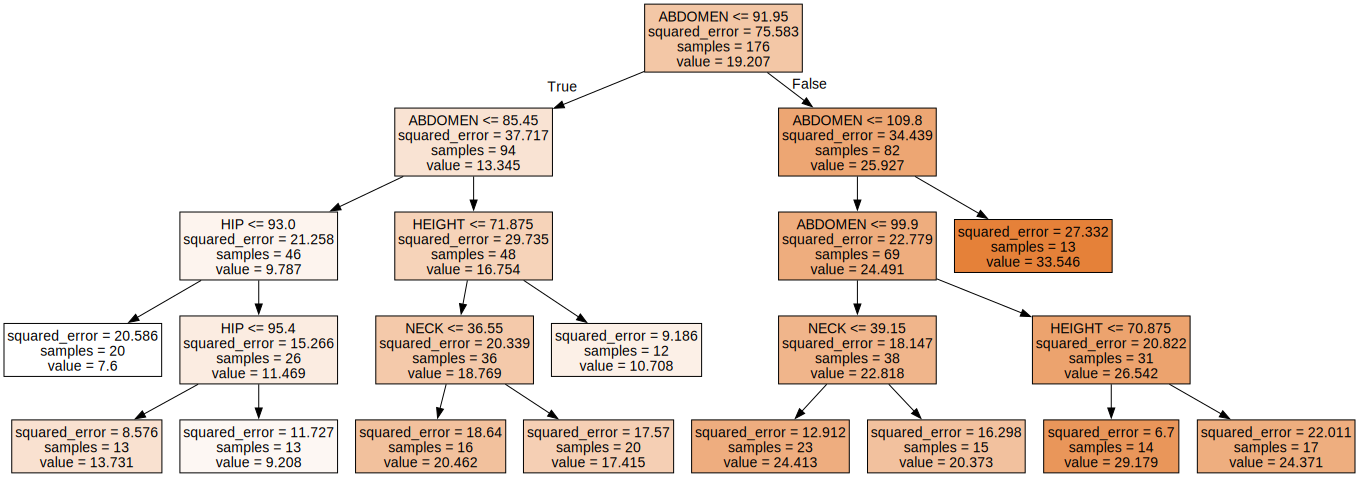

In [51]:
export_graphviz(tree_final, out_file = "tree_final.dot", feature_names=v_feature_name, impurity=True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [52]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.877
2,HEIGHT,0.073
6,HIP,0.029
3,NECK,0.022
0,AGE,0.000
1,WEIGHT,0.000
4,CHEST,0.000
7,THIGH,0.000
8,KNEE,0.000
9,ANKLE,0.000


Text(0, 0.5, '변수')

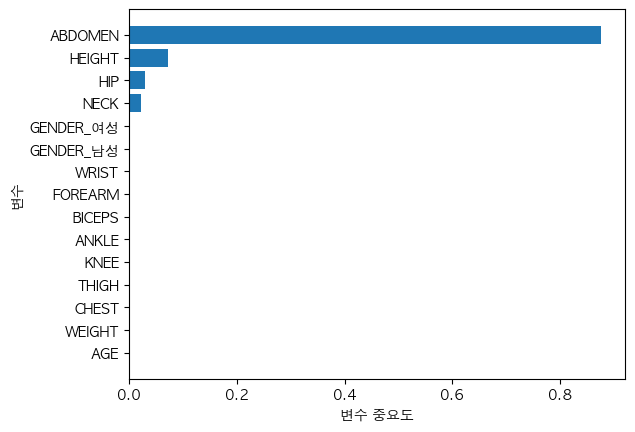

In [53]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [54]:
estimator = DecisionTreeRegressor()

param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": [1.0, "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_features=1.0,
                      min_samples_leaf=6, min_samples_split=32)

best parameter: 
{'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 6, 'min_samples_split': 32}

best score: 
0.654
